In [1]:
# Import packages.
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Generate a random non-trivial quadratic program.
m = 15
n = 10
p = 5
np.random.seed(1)
P = np.random.randn(n, n)
P = P.T@P
q = np.random.randn(n)
G = np.random.randn(m, n)
h = G@np.random.randn(n)
A = np.random.randn(p, n)
b = np.random.randn(p)


In [8]:

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G@x <= h,
                  A@x == b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 86.89141585569907
A solution x is
[-1.68244521  0.29769913 -2.38772183 -2.79986015  1.18270433 -0.20911897
 -4.50993526  3.76683701 -0.45770675 -3.78589638]
A dual solution corresponding to the inequality constraints is
[ 0.          0.          0.          0.          0.         10.45538054
  0.          0.          0.         39.67365045  0.          0.
  0.         20.79927156  6.54115873]


### Sine wave exercise

In [109]:
np.random.seed(1)
n = 2000
sampling_fraction = 0.5
sample_number = int(1 / sampling_fraction)
m = int(n * sampling_fraction) 
print("number of samples: {}".format(m))
A = np.zeros([m, n])
column = 0
for row in range(m):
    A[row,column] = 1
    column += sample_number
print(A)
#A = np.random.randn(m,n) # the sampling matrix. This must reflect the problem
# not all sampling matrices of gaussian distribution work. 

x_true = np.sin(np.arange(n)) # this is an example measurement to 
# evaluate the mesurement matrix and against. 
noise_factor = 0.1
v = np.random.randn(m) * noise_factor # this will be determined by the capacity of the
# sensors. 
y = A.dot(x_true) + v
#plt.plot(y)
#plt.plot(x_true[:10])
#plt.show()

number of samples: 1000
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [110]:
x = cp.Variable(shape=n)
tau = 0.01
regularizer = tau * cp.norm1(x)
loss = cp.norm2(A * x - y)
obj = cp.Minimize(loss + regularizer)
constraints = [x >= -1, x <= 1]
cp.Problem(obj, constraints).solve(solver='ECOS',verbose=False)
#print("final objective value: {}".format(x.value))

7.0587789191499555

mse: 0.2544807286294324


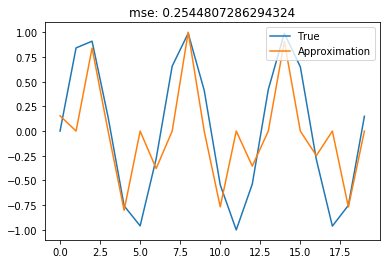

In [111]:
samples = range(0, 20)
mse = np.mean((x.value.ravel() - x_true.ravel())**2)
print('mse: {}'.format(mse))
plt.title('mse: {}'.format(mse))
plt.plot(x_true[samples], label='True')
plt.plot(x.value[samples], label='Approximation')
plt.legend()
plt.show()
